### James Griffin 
#### Project 1 
#### cs 501R 


Empirical evaluation of an agent-based SEIR model over canonical networks

This project builds on Homework 5. Create at least three models for a BYU classroom setting using one of the canonical graph types (e.g., lattice, star, random, ring, ...).  Choose whatever you'd like.

Create an agent-based model for the spread of COVID-19 through the classroom assuming that no quarantining takes place. Agent states should be one from the set susceptible, exposed, infectious, and removed (SEIR). Use probability models from Dr. Berrett's presentation (see slide deck from Feb 3 lecture posted under course content). Use at least two sets of probabilities.

Choose two classroom sizes (e.g., 40, 100), and two models for how frequently the class meets (e.g., every day, MWF, TTh). 

Run multiple simulations since the ABM must sample the probabilities to model randomness in spread.

Explain the kind of classroom layout or seating arrangement that the graph would model.
Discuss how different graph models affect spread.
Discuss how different probability parameters affect spread.
Discuss how classroom size affects spread.
When you present results, include some measure of uncertainty. (One useful approach is to use interquartile range.)
I won't grade on writing style so you needn't spend a lot of time on grammar, but be sure that you explain what choices you make, that you describe results, and that you justify observations about the results.



In [3]:
#import bunch of stuff 
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random
import itertools
import networkx as nx
from itertools import combinations, groupby
import math

In [20]:
#we need to create a bunch of different graphs to then run the agent based models on

#cycle graphs, 
c100 = nx.cycle_graph(100)
c40 = nx.cycle_graph(40)

#star graphs
s100 = nx.star_graph(100)
s40 = nx.star_graph(40)

#latice
l40 = nx.watts_strogatz_graph(40, 4, .4)
l100 = nx.watts_strogatz_graph(100, 4, .4)
t = pd.DataFrame(nx.to_numpy_matrix(l100))

In [5]:
def generate_adj_mat_df(graph):
    adj_mat = pd.DataFrame(nx.to_numpy_matrix(graph))
    return adj_mat

adj_c100 = generate_adj_mat_df(c100)
adj_c40 = generate_adj_mat_df(c40)
adj_s100 = generate_adj_mat_df(s100)
adj_s40 = generate_adj_mat_df(s40)
adj_l100 = generate_adj_mat_df(l100)
adj_l40 = generate_adj_mat_df(l40)


In [6]:
def get_infection_period():
    return int(np.random.normal(2.25, 0.105))

def get_exposure_period():
    return int(np.random.lognormal(1.57, 0.65))

def p_dc(p_1c, day):
    beta = -0.0050367
    molecular = (p_1c / (1 - p_1c)) * np.exp(beta * (day**3 -1))
    denominator = 1 + molecular
    return molecular / denominator 

In [7]:
#Will need this later 
def lognorm(self,x,mu=0,sigma=1):
   a = (math.log(x) - mu)/math.sqrt(2*sigma**2)
   p = 0.5 + 0.5*math.erf(a)
   return p

In [8]:
#tips from barbra 
'''
def time_step_seri(graph, seir_record, susceptible, exposed, infected, recovered, p_1c, day):
    suceptible_temp = []
    exposed_temp = []
    infected_temp = []
    recovered_temp = []

    for index in range(len(seir_record)):
        #getting infected node
        if seir_recored[index][2] == 1:
            infected_temp.append(index)
        
        #getting exposed node 
        if seir_record[index][1] ==1:
            exposed_temp.append(index)
        
        #getting susceptible node
        if seir_record[index][0] == 1:
            suceptible_temp.append(index)
        #getting recovered node
        if seir_record[index]:
            #do more stuff 


    

    for i in infected_temp:
        #new_exposures
        connected_edge = np.where(graph[i == 1)
        connected_edge = list(connected_edge[0])
        print(connected_edge)

        for edge in connected_edge:
            if seir_recored[edge][0] == 1:
                pdc = p_dc(p_1c, day)
                r = random.random()
                if r < pdc: #if edge turn into exposed or not
                    exp = get_exposure_period
                    inp = get_infection_period()

                    #get into SEIR Recordc change status 
                    seir_record[edge][0] = 0
                    seir_record[edge][1] = 1
                    seir_record[edge][4] = day
                    seir_record[edge][5] = exp
                    seir_record[edge][6] = day + exp
                    seir_record[edge][7] = inp

    #new infections 
    for e in exposed_temp:
        #if exposed period is over move to infected 
        if day == seir_record[e][6]:
            #change status 
            seir_record[e][2] = 1
            seir_record[e][1] = 0
        
    for i in infected_temp:
        #recovered, if infected time is over 
        if day >= seir+record[i][6] + seir_record[i][7]:
            seir_record[i][3] = 1
            seir_record[i][2] = 0

    susceptable.append(len(suceptible_temp))
    exposed.append(len(exposed_temp))
    infected.append(len(infected_temp))
    recovered.append(len(recoverd_temp))

    return suceptble, exposed, infected, recovered 

'''

'\ndef time_step_seri(graph, seir_record, susceptible, exposed, infected, recovered, p_1c, day):\n    suceptible_temp = []\n    exposed_temp = []\n    infected_temp = []\n    recovered_temp = []\n\n    for index in range(len(seir_record)):\n        #getting infected node\n        if seir_recored[index][2] == 1:\n            infected_temp.append(index)\n        \n        #getting exposed node \n        if seir_record[index][1] ==1:\n            exposed_temp.append(index)\n        \n        #getting susceptible node\n        if seir_record[index][0] == 1:\n            suceptible_temp.append(index)\n        #getting recovered node\n        if seir_record[index]:\n            #do more stuff \n\n\n    \n\n    for i in infected_temp:\n        #new_exposures\n        connected_edge = np.where(graph[i == 1)\n        connected_edge = list(connected_edge[0])\n        print(connected_edge)\n\n        for edge in connected_edge:\n            if seir_recored[edge][0] == 1:\n                pdc = p_

In [9]:
def p_dc(p_1c, day):
    beta = -0.0050367
    molecular = (p_1c / (1 - p_1c)) * np.exp(beta * (day**3 -1))
    denominator = 1 + molecular
    return molecular / denominator 

In [14]:
#The goal of this lab is to introduce a graphical model to the SEIR model
#coded earlier in the semester 

#copying code over from that lab 

# Just like the last homework except adding a few extra variables 
#this is programming the exposed compartment of the model
def seir_model(sim, t, N, beta, gamma, delta):
    ''' function takes into a simulation state, a time, number of people and 
    then parameters for E, beta and gamma as defined in class '''

    S, E, I, R = sim
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I

    return dSdt, dEdt, dIdt, dRdt

#So we will build a function for simulating the model 
def sim_model(adj_mat_df, class_size,):
    #number of people suceptable will be random
    suceptable = len(adj_mat_df)

    #and we will start with a pre set number of people infected 
    inf = 0
    recov = 0 
    
    #modeling the first year 
    days = range(0,len(adj_mat_df))

    inf_prob = .038

    #and the recovery rate will be the same 
    recov_rate = [.001, .05, .1, .5]
    #recov_rate = .986

    set_infected = [(0, 0)]
    list_infected = [0]
    set_exposed = [(0, 0)]
    list_exposed = [0]
    set_recovered = [0]
    list_infected = [0]

    set_susceptable = [len(adj_mat_df) -1]



    #Not the most efficient way, but I think Im gonna double for loop this
    #for column
    #maybe add a while condition to say that whild the last entry in suceptable is != 0 

    for i in range(len(adj_mat_df)):
        # for each row 
        for j in range(len(adj_mat_df[i])): 
            #if there is an interaction between the people
            if adj_mat_df.loc[i][j] == 1:
                #is someone entiering the exposed state? 
                draw = np.random.uniform(low=0.0, high=1.0, size=1)[0]
                if draw <= .05:
                    #adding this  person  to set_exposed - has entered exposed state 
                    #and this person leaves suceptable and enters exposed 
                    inc_period = np.random.lognormal(mean = 1.57,sigma =.65,size=1).round()
                    #print(inc_period)
                    set_susceptable.append(set_susceptable[-1] -1)
                    list_exposed.append(i)
                    set_exposed.append(((i, inc_period)))
                    #then how long will this person stay in incubation:
                    
                    #getting probabiity of staying infections 
                    #seeing how long he he says infected 
                    num_days = np.arange(0, inc_period, 1)
                    for n in num_days:
                        #continuing in exposed until getting out 
                        set_exposed.append(((i, inc_period - n)))

                        pdc = lognorm(inc_period, random.random())
                        r = random.random()

                        if r < pdc: 
                            #becomes infected 
                            #find the number of days in infected until put in recovered 
                            inf_period = np.random.lognormal(mean = 2.25,sigma =.105,size=1).round()
                            inf_days = np.arange(0, inf_period, 1)                           
                            set_infected.append(((i, inf_period - n)))


                            list_infected.append(i)
                            #and leaves the exposed state
                            set_exposed.remove((i, inc_period - n))

                            #only those infected can recover 
                            #so do essentially the same thing 
                            
                            for k in inf_days:
                                pdc = lognorm(inf_period, random.random())
                                r = random.random()
                                if r < pdc: 
                                    #becomes leaves infected 
                                    set_infected.remove(set_infected[-1])
                                    #and enters recovered state
                                    set_recovered.append(set_recovered[-1]+1)
                                if r >= pdc:
                                    #person stays infected 
                                    set_infected.append(((i, inf_period-k)))
                                    #and does not go into recovered 
                                    set_recovered.append(set_recovered[-1])

                                if n +1 == len(inf_days):
                                    #person recovers 
                                    #leaves infected 
                                    set_infected.remove(set_infected[-1])
                                    list_infected.remove(list_infected[-1])
                                    #and enters recovered state
                                    set_recovered.append(set_recovered[-1]+1)

                        else:
                        #Exposed but not infected 
                        #our susceptable wont change 
                            set_recovered.append(set_recovered[-1])
                            set_infected.append(set_infected[-1])
                            list_infected.append(list_infected[-1])
                    else:
                        set_recovered.append(set_recovered[-1])
                        set_infected.append(set_infected[-1])
                        set_exposed.append(set_exposed[-1])
                        list_infected.append(list_infected[-1])
                        set_susceptable.append(set_susceptable[-1])
                        #our infected wont change
                            #set_infected.append(((i, 0)))
                

                else:
                    #Not exposed so thus not infected and not recovered 
                    set_exposed.append((set_exposed[-1]))
                    set_infected.append(set_infected[-1])
                    set_recovered.append(set_recovered[-1])
                    set_susceptable.append(set_susceptable[-1])
                    list_exposed.append(list_exposed[-1])
                    list_infected.append(list_infected[-1])


    

    set_recovered = set_recovered[:len(set_susceptable)]
    exp = list_exposed
    test = [None]*len(set_susceptable)

    for i in range(len(exp)):
        test[exp[i]] = exp[i]

    t = pd.DataFrame(test).fillna(method='ffill').fillna(0)
    t1 = t[0].tolist()
    #print(t1)
    exp_count = [0]
    for i in range(len(t1)-1):
        if t1[i+1] != t1[i]:
            exp_count.append(exp_count[-1]+1)
        else:
            exp_count.append(exp_count[-1])

    #list_exposed = list_infected[:len(exp_count)]
    days = list(range(0, len(exp_count)))
    list_infected = list_infected[:len(days)]
    
    inf = list_infected
    t2 = [None]*len(list_infected)
    for i in range(len(inf)):
        t2[inf[i]] = inf[i]

    t3 = pd.DataFrame(t2).fillna(method='ffill').fillna(0)
    t4= t3[0].tolist()

    inf_count = [0]
    for i in range(len(t4)-1):
        if t4[i+1] != t4[i]:
            inf_count.append(inf_count[-1]+1)
        else:
            inf_count.append(inf_count[-1])
    #print(inf_count)
    
    
    
    #list_infected
    list_recovered = pd.DataFrame(set_susceptable)
  

    list_recov = list(class_size - list_recovered[0])



    '''
    exposed = len(set(set_exposed))
    S = len(adi_mat_df) #- inf+len(set(set_infected))   
    E = exposed
    I = inf+len(set(set_infected))
    R = random.choice(recov_rate)
    N = S+I+R+E
    #print(N)
    beta =  0.0536
    gamma = R
    delta = random.choice(inc_period)
    #print([S,I,R])
    ret = odeint(seir_model, [S,E,I,R], days, args = (N, beta,  gamma, delta))
    S_, E_, I_, R_ = ret.T

    #making plots all nice 
    textstr = 'seir model  simulation'+ "\n"
    textstr += "Susceptable: "+str(S)+'\n'
    textstr += "Infected: "+str(I)+'\n'
    textstr += "Recovered: "+str(R)+'\n'
    textstr += "Pop_number: "+str(N)+'\n'
    textstr += "Gamma: "+str(gamma)+'\n'
    textstr += 'Beta: '+str(beta)+'\n'
    textstr += "Delta: "+str(delta)+'\n'
    textstr += "R0: "+str(beta/gamma)+'\n'
    '''
    results = pd.DataFrame( 
            {'Susceptable': set_susceptable,
             "Exposed": exp_count,
             'Infected': inf_count,
             'Recovered': list_recov,
             'Days':days
            })
        #print(results.head())
    results.plot(x ='Days', y = ['Susceptable', "Exposed", 
                                     "Infected", 'Recovered'], kind = 'area', 
                     stacked = False)
    #print(len(results))
    plt.title("SEIR Model")
    #plt.text(1, 0.1, fontsize = 12,transform=plt.gcf().transFigure)
    #'''          
    plt.show()


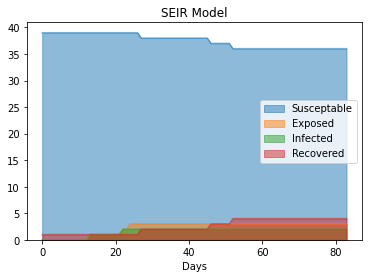

This is for a cycle graph of 40 people 


In [15]:
sim_model(adj_c40, 40)
print("This is for a cycle graph of 40 people ")

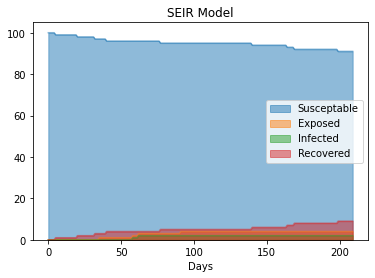

This is for a star graph of 100 people 


In [16]:
sim_model(adj_s100, 100)
print("This is for a star graph of 100 people ")

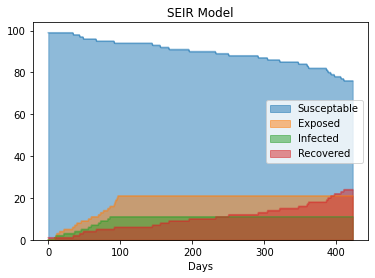

This is for a perturbed lattice graph of 100 people 


In [21]:
sim_model(adj_l100, 100)
print("This is for a perturbed lattice graph of 100 people ")

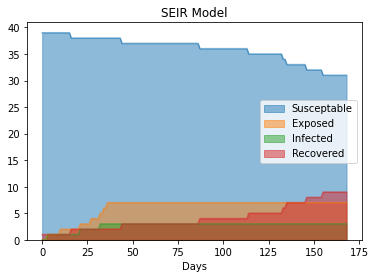

This is for a perturbed lattice graph of 100 people 


In [22]:
sim_model(adj_l40, 40)
print("This is for a perturbed lattice graph of 100 people ")

Ok so this is my write up part of the project: 

This program can take in any type of graph, but here I only tested 3 as directed by the project spects. The types of graphs were a cycle, star and a watts-strogatz graph, where we preturb the lattice graph slightly, to make it more complex. We had two class sizes which were the number of nodes for each graph, 40 or 100. The cycle and star graphs are more of an isolation, social distanced scinario, where interactions are limited and the Watts Strogatz preturbed lattice graph provides more of a practical approach to life. Where we are careful and social distance, but have to go to the store, have interactions that are unplanned where we come across different people or places than our immidate families, providing more opportunitiess to interact with the virus. 

So for the model directly, above, that is the lattice graph, that has been slightly preturbed, according to the Watts-Strogatz methods that we covered in class. I used a beta value of .4, redirecting some of the edges to different nodes, with a probability of .4, instead of the ones right next to them. While still a rather simple graph, it is this increased complexity from the randomness that allows the populations of infected and exposed persons to increase faster and to higher levels than the more simple star and cycle graphs. The steady decrease in in the susceptable  population is the inverse of our recovered population. for every person who moves away from susceptable, that is one person recovered. however to get to recovered, one must first become exposed and then infected. The goal of communities has been to try and have that passing be controlled in some way. 

We can contrast the preturbed Watts-Strogatz graph with the star and cycle graphs that we showed first. The star graph is the simplest examle. Because every node is only connected to one other node in the graph, and each graph is connected to the same nodes, almost none of the nodes interact directly with one another, and given this structure, it is even unlikley that they have second hand exposure to an infected person / node. Thus the opportunitites for transmtion of the virus are low. This can also be seen in the cycle graph, which is the first one graph we have shown. We can clearly see that the cycle graph is less of an, "complete isolation" graph and more of a quarantine with those around you and limit interactions graph. As their populations for exposed/ infected/ recovered are higher, but again, very low because of the limited interactions of only its direct neighbors.

Again the pertubred lattice model is the one with the most amount of interactions spanning the graph, so nodes have more opportunities to interact with others that are not directly within 2 nodes on either side. This greater interaction is what is leading to the rise in the infections population. If we were to look at a more complecated graph, perhaps a complete or some other form of graph where nodes are more interconnected and people have more interactions, we would undoubtedly see more exposure, infection and recovery, simply as a funtion that the virus would have more opportunities to spread and people would have more opportuntiies to move along the progression of the path. 

Increasing the classroom size would not change very much the spread of the star graph, going from 40 people in essentially complete isolation to 100 people in complete issolation, still gives very low risk of transmition. however the Watts Strogatz lattice grpah, is the one where a difference could be potentially made. We can see both graphs above. Because the population is lower, the number of potential transmisions is also lower. They behave very similarly, because they very similar graphs, but they have different population growth rates for the different categories. 

If we had taken different probabiltiies, increasing the mean of incubation periods for infected and exposed, or increasing the varience, we would have seen different results. with a higher mean, but a wider varience, we could have seen people stay infected for longer or very short time periods. providing more vairnence to the growth rates of the different sub populations of each group 


